In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [3]:
data = pd.read_excel('C:/Users/91703/OneDrive/Desktop/marketing  document.csv.xlsx')

In [4]:
def preprocess_text():
    data['cleaned_text'] = data['Column1'].apply(preprocess_text)

In [5]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Column1'])


In [11]:
num_topics = 6
nmf = NMF(n_components=num_topics, random_state=42)
nmf.fit(tfidf_matrix)

NMF(n_components=6, random_state=42)

In [12]:
def get_top_words(model, feature_names, n_words=10):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[-n_words:][::-1]
        top_words.append([feature_names[i] for i in top_words_idx])
    return top_words

In [13]:
# Get the top words for each topic
feature_names = tfidf_vectorizer.get_feature_names_out()
top_words = get_top_words(nmf, feature_names)

# Print the top words for each topic
for i, words in enumerate(top_words):
    print(f"Topic {i + 1}: {' '.join(words)}")

Topic 1: predictive advanced detecting investigative public patterns medical health fraudsters collaboration
Topic 2: investigative medical public predictive patterns health fraudsters detecting collaboration advanced
Topic 3: collaboration patterns public predictive medical investigative health fraudsters detecting advanced
Topic 4: health advanced public predictive patterns medical investigative fraudsters detecting collaboration
Topic 5: public advanced predictive patterns medical investigative health fraudsters detecting collaboration
Topic 6: fraudsters patterns detecting public predictive medical investigative health collaboration advanced


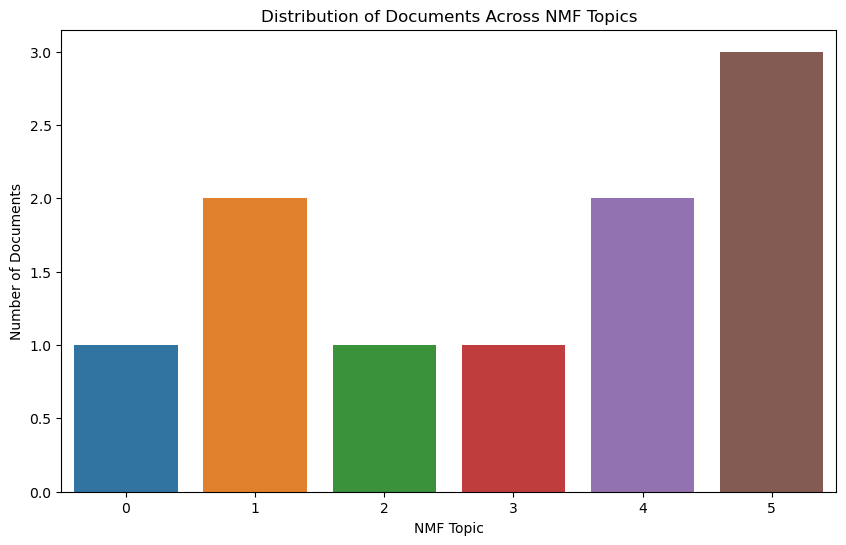

Topic 1: predictive advanced detecting investigative public patterns medical health fraudsters collaboration
Topic 2: investigative medical public predictive patterns health fraudsters detecting collaboration advanced
Topic 3: collaboration patterns public predictive medical investigative health fraudsters detecting advanced
Topic 4: health advanced public predictive patterns medical investigative fraudsters detecting collaboration
Topic 5: public advanced predictive patterns medical investigative health fraudsters detecting collaboration
Topic 6: fraudsters patterns detecting public predictive medical investigative health collaboration advanced


In [15]:
# Get the topic distribution for each document
nmf_topic_distribution = nmf.transform(tfidf_matrix)

# Assign the most probable topic to each document
data['nmf_topic'] = nmf_topic_distribution.argmax(axis=1)

# Visualize the distribution of documents across topics
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='nmf_topic')
plt.title("Distribution of Documents Across NMF Topics")
plt.xlabel("NMF Topic")
plt.ylabel("Number of Documents")
plt.show()

# Explore the topics and check for patterns
for topic_idx, words in enumerate(top_words):
    print(f"Topic {topic_idx + 1}: {' '.join(words)}")
    topic_docs = data[data['nmf_topic'] == topic_idx]['Column1']